In [92]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek,SMOTEENN

In [2]:
feat = pd.read_csv('Company_Data.csv')
feat

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
feat.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [5]:
feat.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
feat[feat.duplicated()].shape

(0, 11)

<ipython-input-7-a9630fdce02e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feat[param], color = "red", hist_kws={"rwidth":0.80, 'alpha':1.0})


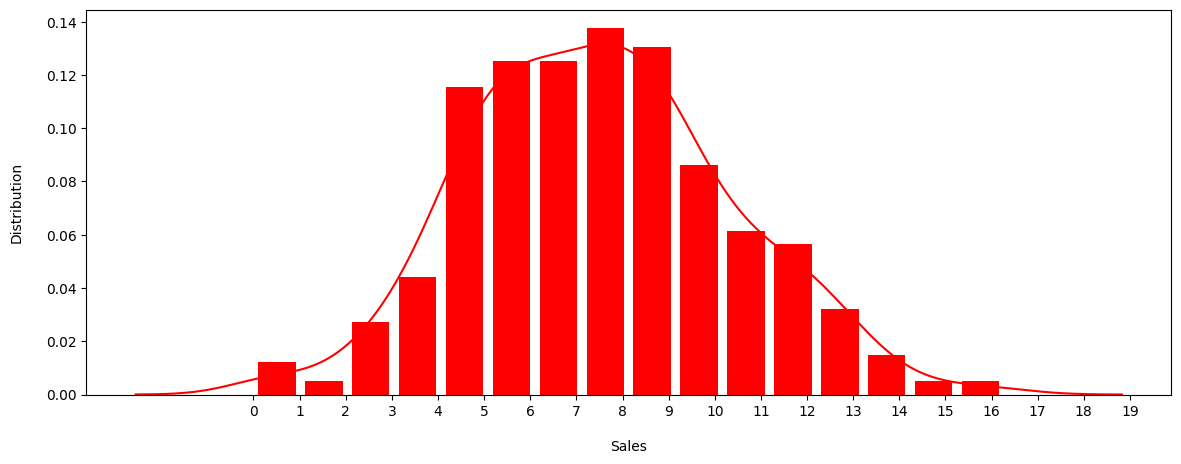

In [7]:
def distplot(param):
    plt.figure(figsize=(14,5))
    sns.distplot(feat[param], color = "red", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1))
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")

In [8]:
feat.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [9]:
feat1 = feat.copy()
feat1['SalesCat']=pd.cut(x=feat1['Sales'],bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
feat1

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US SalesCat  
0           17   Yes  Yes     High  
1           10   Yes  Yes     High  
2           12   Yes  Yes     High  
3           14   Yes  Yes   Medium  
4           13   Yes   No      Low  
..         ...   ...  ...      ...  
395         14   Yes  Yes     High  
396         11    No  Yes   Medium  
397         18   Yes  Yes   Medium  
398         12   Yes  Yes   Medium  
399         16   Yes  Yes     High  

[400 rows x 12 columns]

In [10]:
feat1.SalesCat.value_counts()

Medium    198
High      102
Low       100
Name: SalesCat, dtype: int64

In [11]:
categorical_features=feat1.describe(include=['object','category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'SalesCat'], dtype='object')

In [12]:
numerical_features = feat1.describe(include=['int64','float64']).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [13]:
# outliers
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

<ipython-input-14-9234e91591c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales', data= outliers,palette='crest',ax=axes[0])
<ipython-input-14-9234e91591c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CompPrice',data= outliers,palette='crest',ax=axes[1])
<ipython-input-14-9234e91591c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income',data= outliers,palette='crest',ax=axes[2])
<ipython-input-14-9234e91591c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

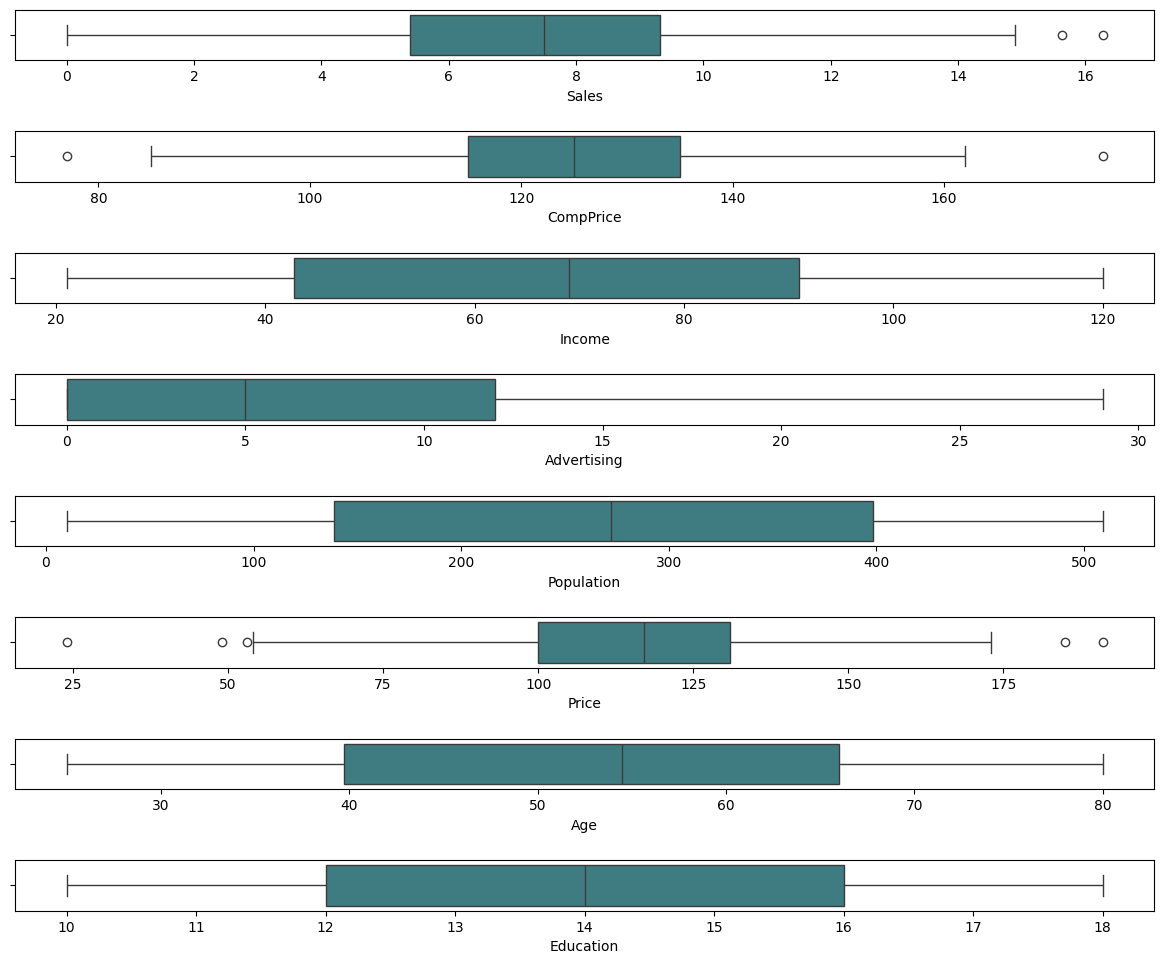

In [14]:
outliers = feat1.copy()
fig, axes = plt.subplots(8,1,figsize=(12,10),sharex=False,sharey=False)
sns.boxplot(x='Sales', data= outliers,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data= outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data= outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data= outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data= outliers,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data= outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data= outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data= outliers,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

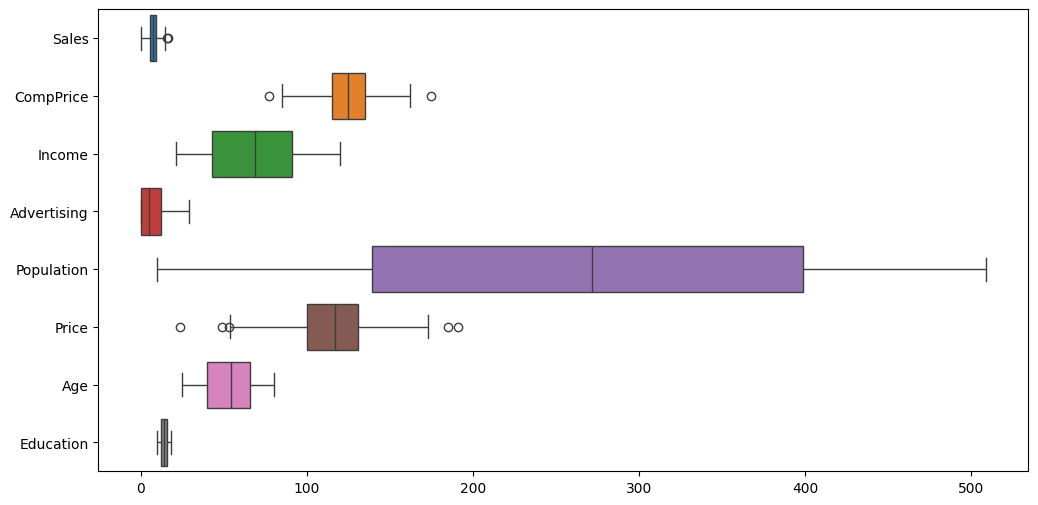

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=feat1[numerical_features], orient="h")
plt.show()

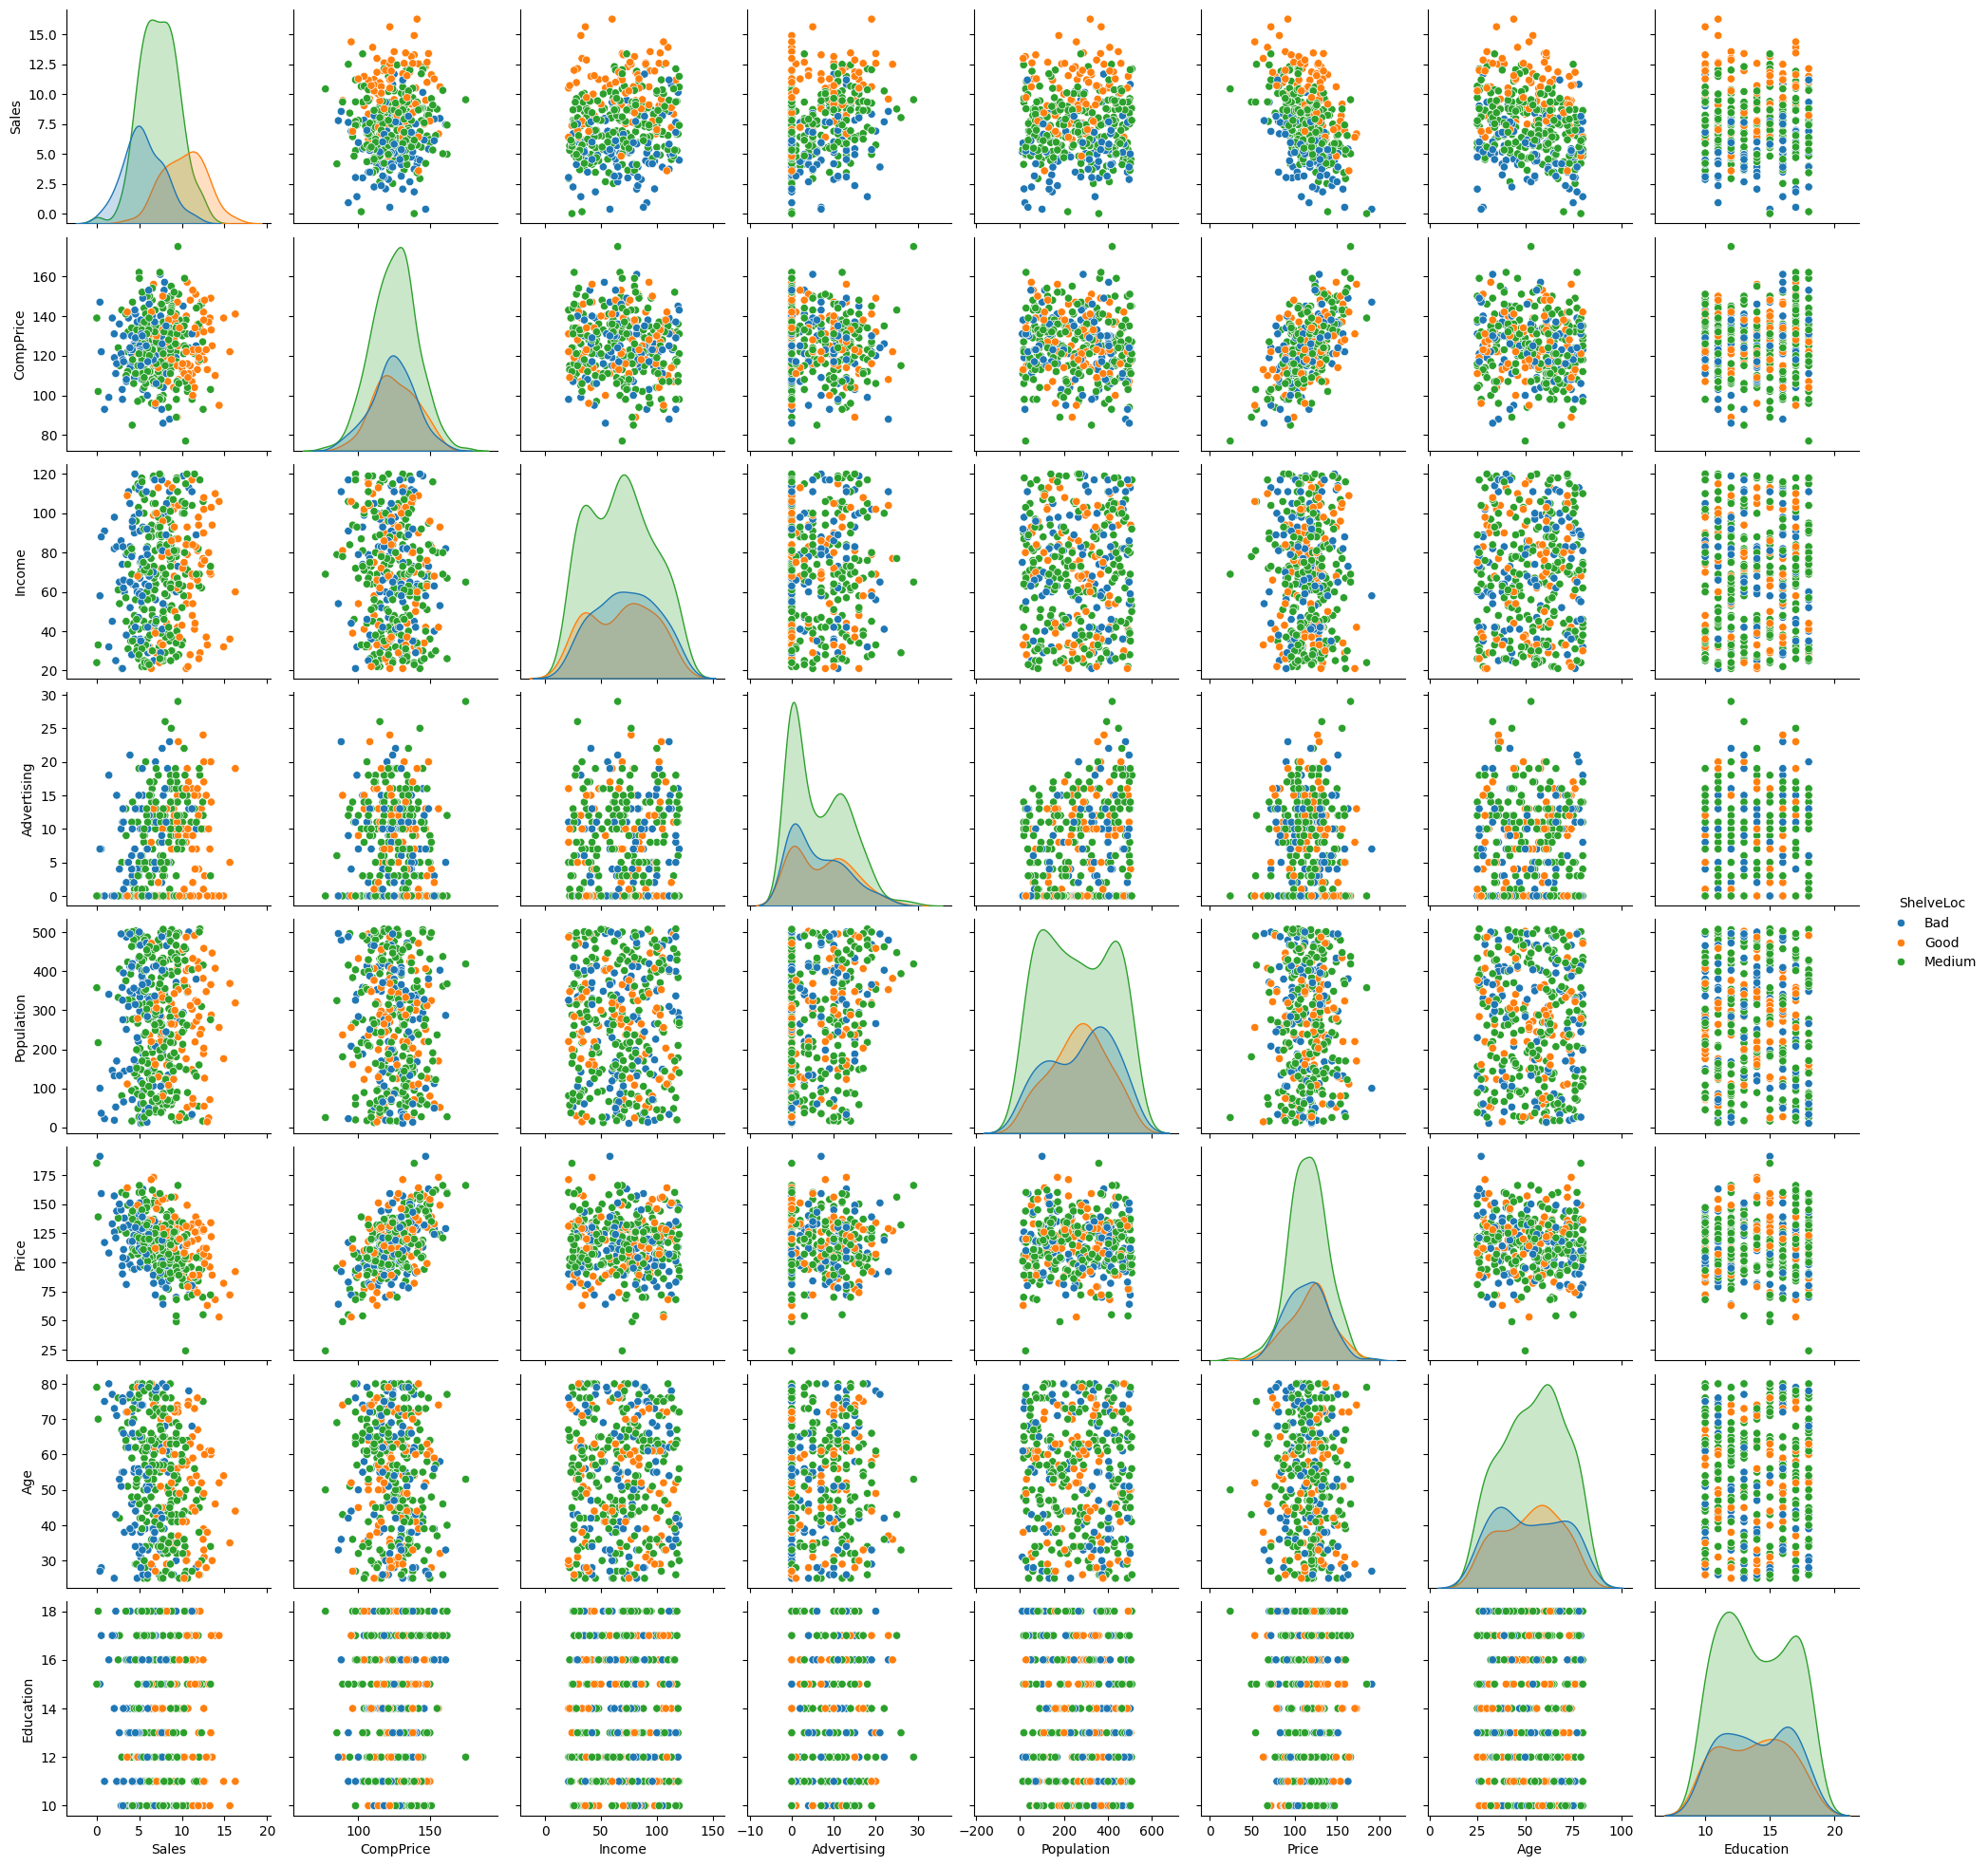

In [31]:
sns.pairplot(data = feat1, hue = 'ShelveLoc')

<ipython-input-32-bc48272cbcbe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(feat1.corr(), annot=True, fmt='.2g', cmap="viridis")


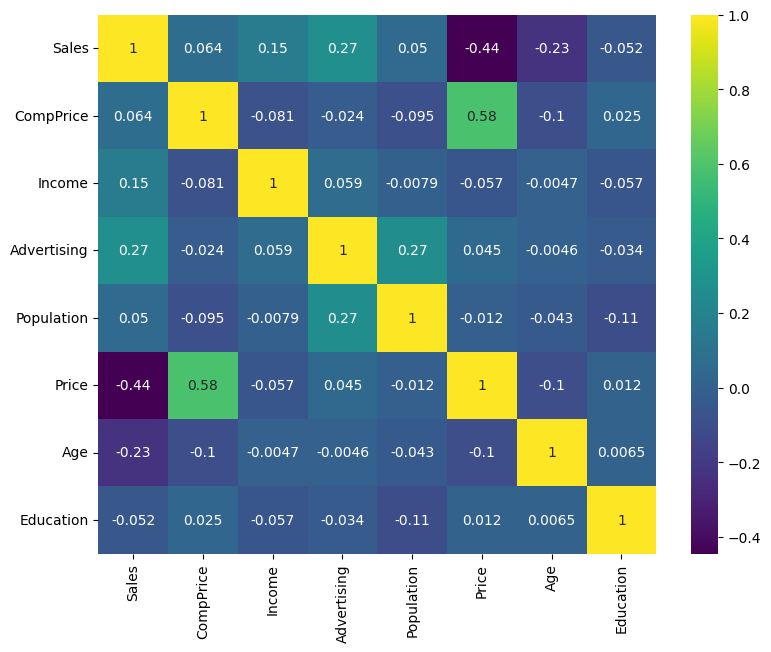

In [32]:
# having a correlation matrix
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(feat1.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

Index(['ShelveLoc', 'Urban', 'US', 'SalesCat'], dtype='object')


<ipython-input-18-5d155d1c624b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= feat1, x=column, palette = "dark")
<ipython-input-18-5d155d1c624b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= feat1, x=column, palette = "dark")
<ipython-input-18-5d155d1c624b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= feat1, x=column, palette = "dark")
<ipython-input-18-5d155d1c624b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

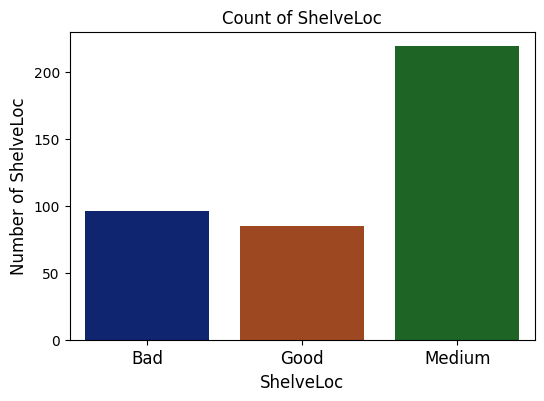

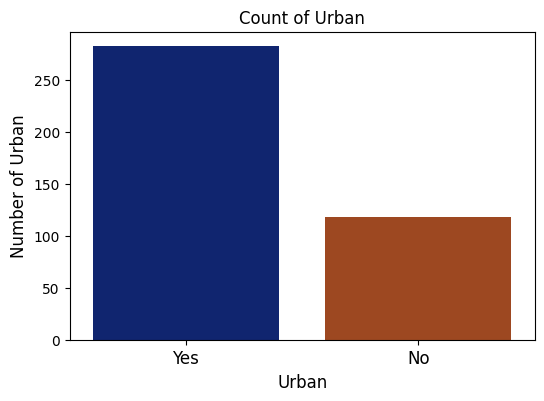

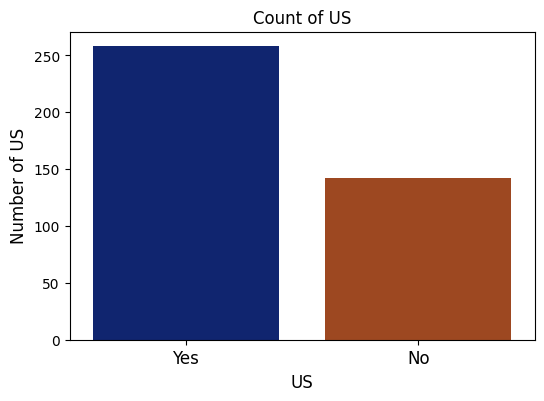

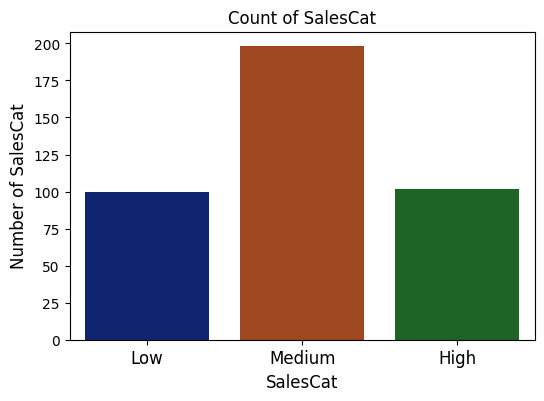

In [18]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(6,4))
    unique = feat1[column].value_counts(ascending=True);
    plt.title("Count of "+ column)
    sns.countplot(data= feat1, x=column, palette = "dark")
    plt.xticks(rotation = 0, size = 12)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

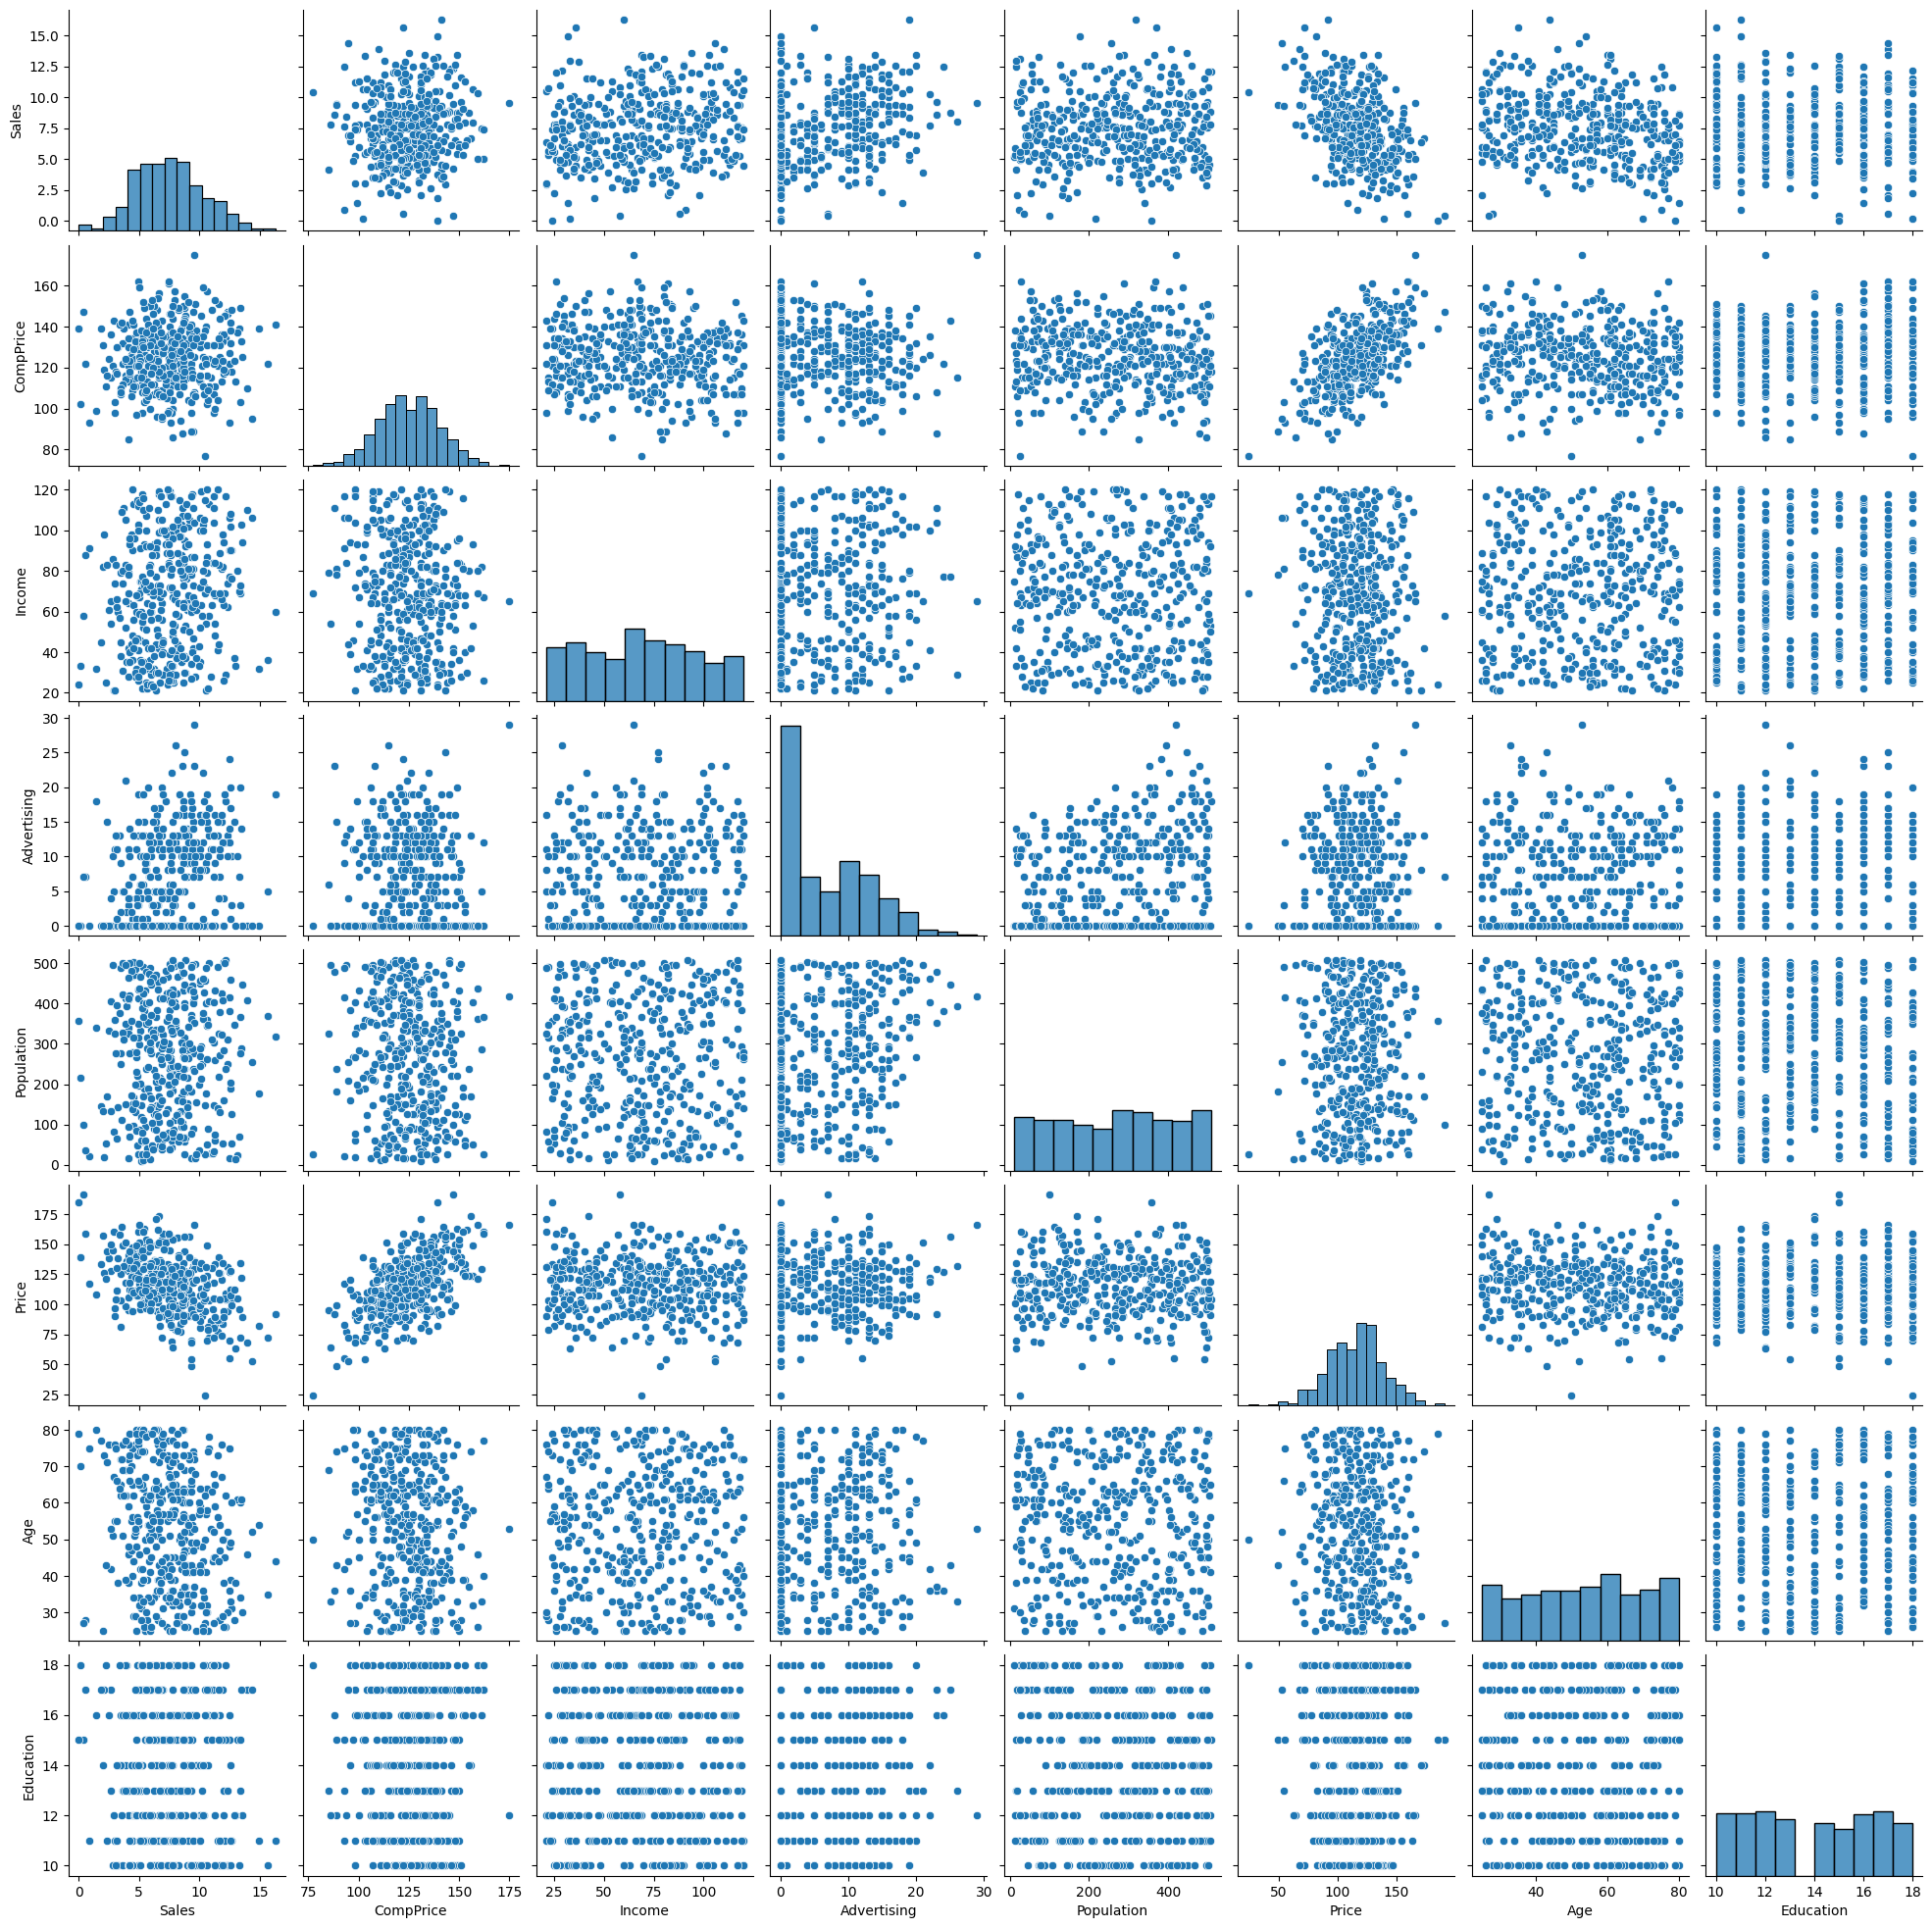

In [19]:
sns.pairplot(feat1, palette='coolwarm')
plt.show()

In [33]:
feat_data_dummi = feat1.copy()
feat_data_dummi.drop('Sales',axis=1, inplace =True)
feat_data_dummi = pd.get_dummies(feat_data_dummi.iloc[:,:-1])
feat_data_dummi

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        1       0  
..     ...     ...  
395      0       1  
396      0       1  
397      0       1  
398      0       1  
399      0       1  

[400 rows x 14 columns]

In [34]:
feat2 = feat_data_dummi.copy()

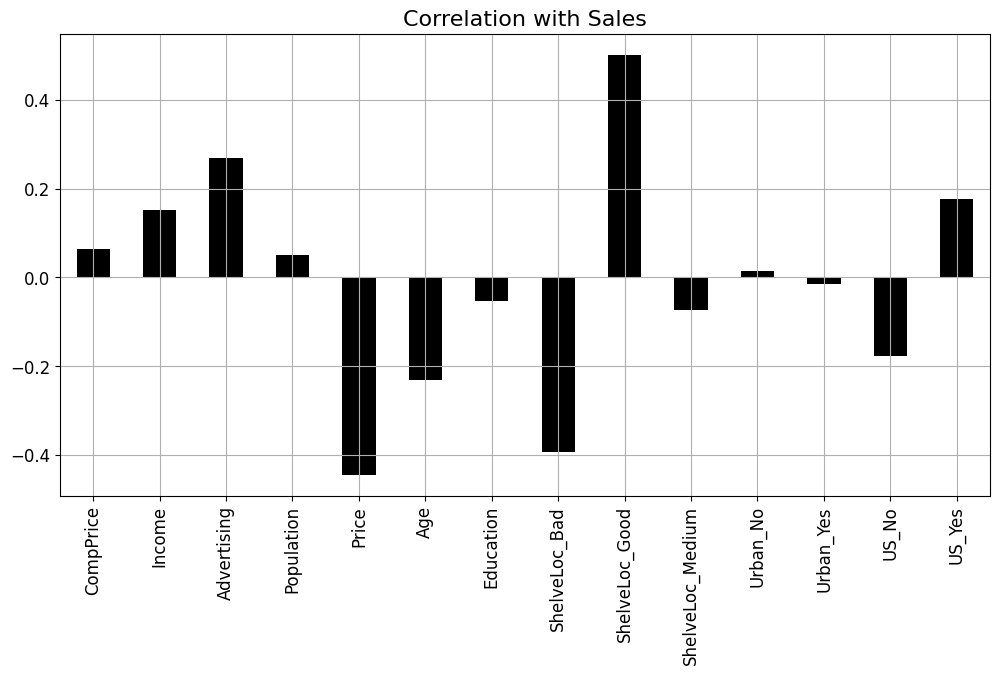

In [22]:
correlations = feat2.corrwith(feat1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations <0].sort_values(ascending = False)

correlations.plot.bar(figsize = (12,6), fontsize = 12, color = 'black', rot = 90, grid = True)
plt.title('Correlation with Sales',fontsize = "16")
plt.show()

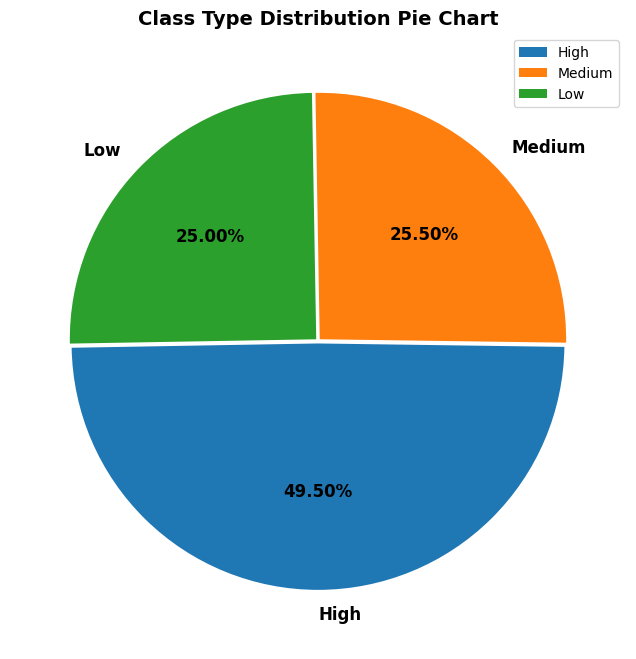

In [23]:
# checking imbalanced or balanced data with regards to the target
plt.figure(figsize = (9,8))
plt.pie(feat1['SalesCat'].value_counts(), labels= feat1.SalesCat.unique(), explode = [0.01,0.01,0.01],
       autopct= '%.2f%%', startangle= 181, textprops = {'size':'large','fontweight':'bold','rotation':'horizontal','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 14, fontweight = 'bold')
plt.show()

In [24]:
feat1.SalesCat.value_counts()

Medium    198
High      102
Low       100
Name: SalesCat, dtype: int64

<ipython-input-25-e068fc63ac29>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'SalesCat', data= feat1, palette= 'viridis', order= feat1['SalesCat'].value_counts().index)


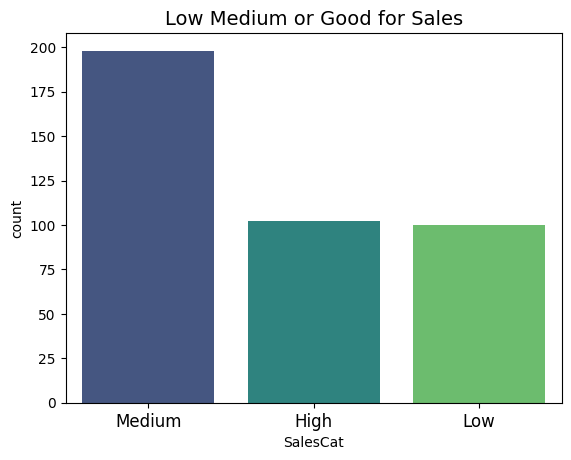

In [25]:
sns.countplot(x= 'SalesCat', data= feat1, palette= 'viridis', order= feat1['SalesCat'].value_counts().index)
plt.xticks(fontsize= 12)
plt.title('Low Medium or Good for Sales', fontsize= 14)
plt.show()

In [26]:
feat3 = feat1.copy()


In [27]:
feat3.drop('Sales',axis=1,inplace = True)
feat3 = pd.get_dummies(feat3.iloc[:,:-1])
feat3

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        1       0  
..     ...     ...  
395      0       1  
396      0       1  
397      0       1  
398      0       1  
399      0       1  

[400 rows x 14 columns]

In [28]:
feat3['Sales'] = feat1.SalesCat
feat3

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes   Sales  
0        0       1    High  
1        0       1    High  
2        0       1    High  
3        0       1  Medium  
4        1       0     Low  
..     ...     ...     ...  
395      0       1    High  
396      0       1  Medium  
397      0       1  Medium  
398      0       1  Medium  
399      0       1    High  

[400 rows x 15 columns]

In [29]:
# Label Encoding
le=LabelEncoder()
le.fit(feat3['Sales'])
feat3['Sales']=le.transform(feat3['Sales'])
feat3

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  Sales  
0        0       1      0  
1        0       1      0  
2        0       1      0  
3        0       1      2  
4        1       0      1  
..     ...     ...    ...  
395      0       1      0  
396      0       1      2  
397      0       1      2  
398      0       1      2  
399      0       1      0  

[400 rows x 15 columns]

In [41]:
x = feat3.iloc[:, :-1]
y=  feat3.Sales

In [40]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

In [42]:
scores = fit.scores_
features = fit.transform(x)

In [43]:
score_feat_data = pd.DataFrame(list(zip(x.columns, scores)), columns =['Feature','Score'])
score_feat_data.sort_values(by="Score", ascending=False, inplace=True)
score_feat_data

Feature       Score
4              Price  300.881058
2        Advertising  251.767458
3         Population  141.113336
5                Age  106.577639
8     ShelveLoc_Good   66.174919
1             Income   65.145403
7      ShelveLoc_Bad   48.524460
12             US_No   13.109136
9   ShelveLoc_Medium    8.654770
13            US_Yes    7.215106
0          CompPrice    2.253637
6          Education    0.689685
10          Urban_No    0.163751
11         Urban_Yes    0.068520

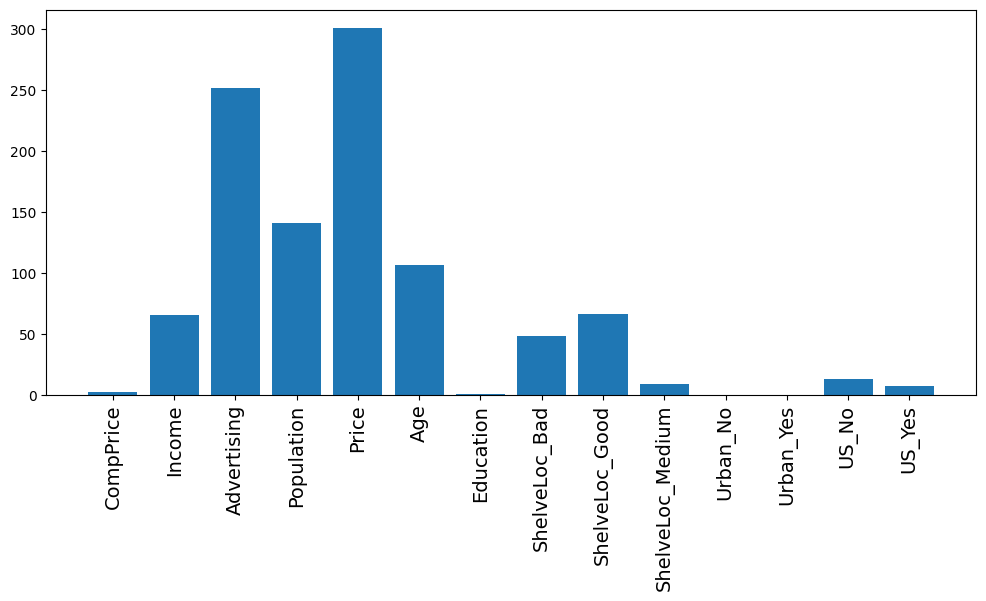

In [44]:
fig, axes = plt.subplots(figsize=(12,5))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation= 90, size= 14)
plt.show()

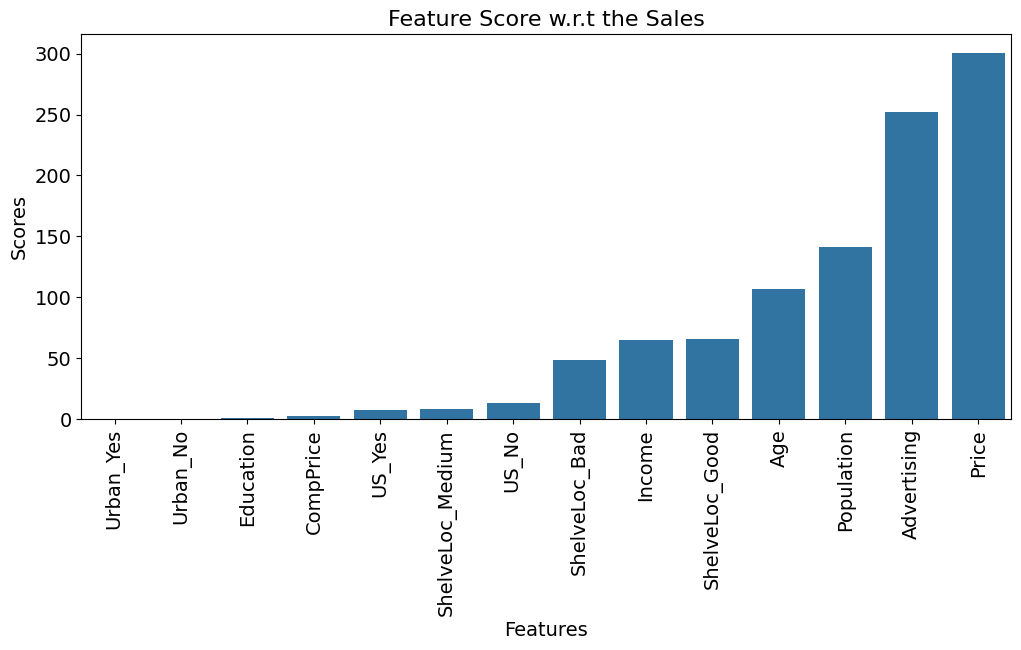

In [46]:
plt.figure(figsize=(12,5))
sns.barplot(x='Feature', y="Score", data= score_feat_data, order=score_feat_data.sort_values('Score').Feature)
plt.xlabel("Features", size=14)
plt.ylabel("Scores", size=14)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Score w.r.t the Sales", size=16)
plt.show()

In [48]:
model_data = feat3[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

In [53]:
# Random Forest Built in Feature
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
rf_classifier.fit(x, y)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200], 'n_estimators': [10,25,30,50,100,200]}

grid_search = GridSearchCV(estimator= rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x, y)
rf_best = grid_search.best_estimator_

print('Checking the oob score :', rf_classifier.oob_score_)
print('Best Score             :', grid_search.best_score_)
print('RF Best Model          :', rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Checking the oob score : 0.635
Best Score             : 0.66
RF Best Model          : RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)


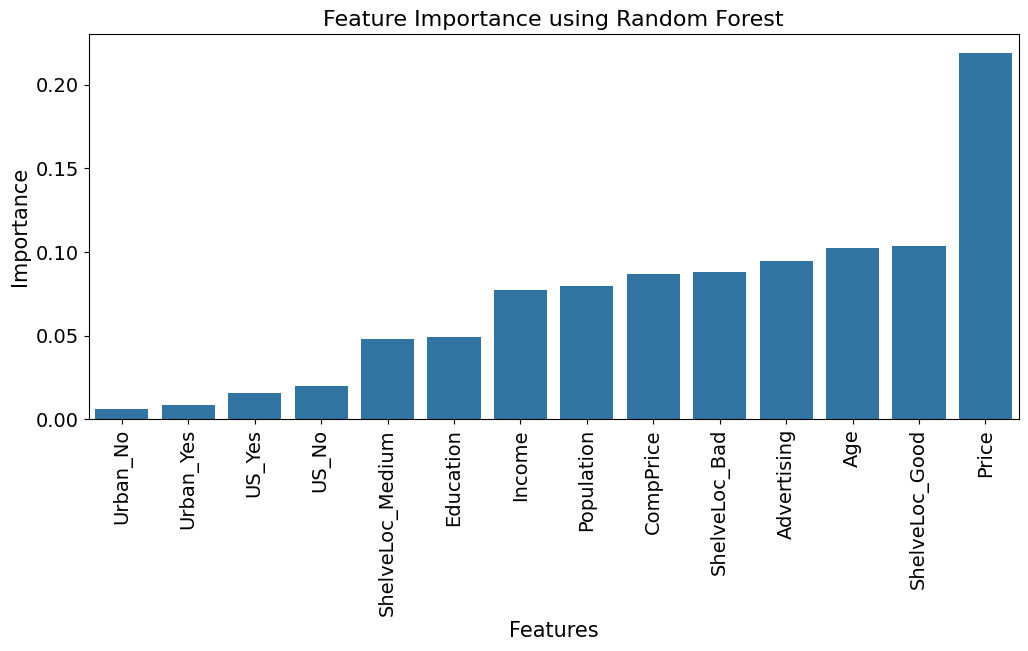

In [54]:
# sort the data with help of feature importance
rf_best.feature_importances_
imp_df = pd.DataFrame({"Feature": x.columns, "Importance": rf_best.feature_importances_})

plt.figure(figsize=(12,5))
sns.barplot(x= 'Feature', y= "Importance", data= imp_df, order= imp_df.sort_values('Importance').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Importance using Random Forest", size=16)
plt.show()

In [55]:
# test train split with imbalanced dataset
x = model_data.drop('Sales',axis=1)
y = model_data['Sales']

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [57]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (280, 8)
Shape of x_test  :  (120, 8)
Shape of y_train :  (280,)
Shape of y_test  :  (120,)


In [60]:
# STRATIFIEDFOLD
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data :',counter_train)
print('Testing Data  :',counter_test)

Training Data : Counter({2: 178, 0: 92, 1: 90})
Testing Data  : Counter({2: 20, 1: 10, 0: 10})


In [ ]:
"""
Stratify parameter makes a split so that the proportion of values in the sample produced will be the
same as the proportion of values provided to parameter stratify.
"""

In [61]:
# Grid Search using stratified kfold splits on imbalanced dataset
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [64]:
rf_clf1 = RandomForestClassifier(n_estimators=100)
rf_clf1.fit(train_x, train_y)

print_score(rf_clf1, train_x, train_y, test_x, test_y, train=True)
print_score(rf_clf1, train_x, train_y, test_x, test_y, train=False)

Train Result:
Accuracy Score: 100.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    92.0  90.0  178.0       1.0      360.0         360.0
__________________________________________________________________________
Confusion Matrix: 
 [[ 92   0   0]
 [  0  90   0]
 [  0   0 178]]

Test Result:
Accuracy Score: 50.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy  macro avg  weighted avg
precision   0.666667   0.375000   0.500000       0.5   0.513889      0.510417
recall      0.400000   0.300000   0.650000       0.5   0.450000      0.500000
f1-score    0.500000   0.333333   

In [65]:
# grid search using train test splits stratifying target feature on inbalanced dataset
rf_clf2 = RandomForestClassifier(n_estimators=100)
rf_clf2.fit(x_train, y_train)

print_score(rf_clf2, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf2, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    71.0  70.0  139.0       1.0      280.0         280.0
__________________________________________________________________________
Confusion Matrix: 
 [[ 71   0   0]
 [  0  70   0]
 [  0   0 139]]

Test Result:
Accuracy Score: 63.33%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.740741   0.583333   0.608696  0.633333    0.644257      0.636467
recall      0.645161   0.466667   0.711864  0.633333    0.607897      0.633333
f1-score    0.689655   0.518519

In [ ]:
"""
Observation:-
In both the condition, due to imbalanced dataset our results are getting biased towards the
majority. The model is correctly classifying all the majority classes yet fails to classify the minority
classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

"""

In [66]:
# Handling IMbalance data using SMOTE based techniques
x = model_data.drop(['Sales'], axis=1)
y = model_data['Sales']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=15,stratify=y)

In [67]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (280, 8)
Shape of x_test  :  (120, 8)
Shape of y_train :  (280,)
Shape of y_test  :  (120,)


In [70]:
counter1 = Counter(y_train)
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
counter2 = Counter(y_train_sm)

print('Before :',counter1)
print('After  :',counter2)

Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({1: 139, 2: 139, 0: 139})


In [73]:
# Adasyn Adaptive Synthtic sampling approach
counter1 = Counter(y_train)
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)
counter2 = Counter(y_train_ada)

print('Before :',counter1)
print('After  :',counter2)

Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({1: 140, 2: 139, 0: 135})


In [78]:
# hybrid smote + tomek links
counter1 = Counter(y_train)
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)
counter2 = Counter(y_train_smtom)

print('Before :',counter1)
print('After  :',counter2)

Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({1: 129, 0: 129, 2: 121})


In [79]:
# hybridization smote+enn
counter1 = Counter(y_train)
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)
counter2 = Counter(y_train_smenn)

print('Before :',counter1)
print('After  :',counter2)

Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({0: 63, 1: 60, 2: 10})


In [82]:
sample_data = {'ACTUAL':[x_train, y_train], 'SMOTE':[x_train_sm, y_train_sm], 'ADASYN':[x_train_ada, y_train_ada],
               'SMOTE_TOMEK':[x_train_smtom, y_train_smtom], 'SMOTE_ENN':[x_train_smenn, y_train_smenn]}

In [83]:
def test_eval(clf_model, x_test, y_test, algo= None, sampling=None):
    # Test set prediction
    y_prob = clf_model.predict_proba(x_test)
    y_pred = clf_model.predict(x_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")

    f1        = f1_score(y_test, y_pred, average='micro')
    recall    = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')

    return algo,precision,recall,f1,sampling

In [84]:
model_params = {'random-forest' : {'model' : RandomForestClassifier(), 'params' : {"n_estimators": [5, 10, 15, 20, 25],
                'max_depth': [i for i in range(5,16,2)], 'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
                'min_samples_leaf': [1, 2, 5], 'criterion': ['gini', 'entropy'], 'max_features': ['log2', 'sqrt', 'auto']}}}

In [93]:
cv = StratifiedKFold (n_splits=5, random_state=100, shuffle=True)
output = []
for model, model_hp in model_params.items():
    for resampl, data in sample_data.items():
        clf3 = RandomizedSearchCV (model_hp['model'], model_hp['params'], cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf3.fit(data[0], data[1])
        clf_best1 = clf3.best_estimator_
        print('='*60)
        print(model+' with ' + resampl)
        print('-'*60)
        output.append(test_eval(clf_best1, x_test, y_test, model, resampl))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


random-forest with ACTUAL
------------------------------------------------------------
Confusion Matrix
[[18  0 13]
 [ 0 11 19]
 [10  3 46]] 

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        31
           1       0.79      0.37      0.50        30
           2       0.59      0.78      0.67        59

    accuracy                           0.62       120
   macro avg       0.67      0.58      0.59       120
weighted avg       0.65      0.62      0.61       120
 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


random-forest with SMOTE
------------------------------------------------------------
Confusion Matrix
[[22  1  8]
 [ 0 15 15]
 [10 10 39]] 

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        31
           1       0.58      0.50      0.54        30
           2       0.63      0.66      0.64        59

    accuracy                           0.63       120
   macro avg       0.63      0.62      0.63       120
weighted avg       0.63      0.63      0.63       120
 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


random-forest with ADASYN
------------------------------------------------------------
Confusion Matrix
[[22  1  8]
 [ 0 15 15]
 [13  6 40]] 

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        31
           1       0.68      0.50      0.58        30
           2       0.63      0.68      0.66        59

    accuracy                           0.64       120
   macro avg       0.65      0.63      0.63       120
weighted avg       0.65      0.64      0.64       120
 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


random-forest with SMOTE_TOMEK
------------------------------------------------------------
Confusion Matrix
[[30  0  1]
 [ 4 24  2]
 [31 14 14]] 

Classification Report
              precision    recall  f1-score   support

           0       0.46      0.97      0.62        31
           1       0.63      0.80      0.71        30
           2       0.82      0.24      0.37        59

    accuracy                           0.57       120
   macro avg       0.64      0.67      0.57       120
weighted avg       0.68      0.57      0.52       120
 

random-forest with SMOTE_ENN
------------------------------------------------------------
Confusion Matrix
[[25  6  0]
 [ 3 26  1]
 [31 27  1]] 

Classification Report
              precision    recall  f1-score   support

           0       0.42      0.81      0.56        31
           1       0.44      0.87      0.58        30
           2       0.50      0.02      0.03        59

    accuracy                           0.43       120
   macr

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [96]:
counter1 = Counter(y_train)
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)
counter2 = Counter(y_train_ada)

print('Before :',counter1)
print('After  :',counter2)

Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({1: 140, 2: 139, 0: 135})


In [97]:
x_train,x_test,y_train,y_test = train_test_split(x_train_ada,y_train_ada,test_size=0.3,random_state=0, stratify=y_train_ada)

counter1 = Counter(y_train_ada)
counter2 = Counter(y_train)
print('Before           :',counter1)
print('After            :',counter2)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ", x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Before           : Counter({1: 140, 2: 139, 0: 135})
After            : Counter({1: 98, 2: 97, 0: 94})
Shape of X_train :  (289, 8)
Shape of X_test  :  (125, 8)
Shape of y_train :  (289,)
Shape of y_test  :  (125,)


In [98]:
# Random Forest
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 12)
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [99]:
loc = np.array(score_array).max()
score_array.index(loc)+1

26

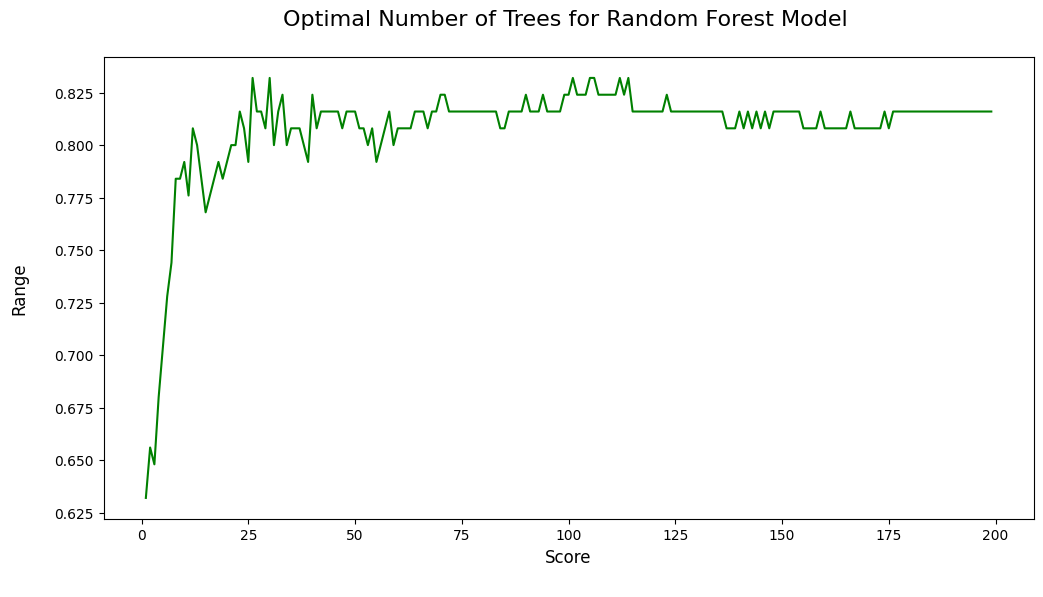

In [100]:
fig = plt.figure(figsize=(12,6))
plt.plot(range(1,200),score_array, color = 'g')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n', horizontalalignment="center", fontsize = 16)
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [101]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV (estimator=rf_clf, scoring='f1',param_distributions=random_grid,
                            n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best paramters: {'n_estimators': 195, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True})


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 93.77%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.947368   0.923077   0.944444  0.937716    0.938297      0.938150
recall      0.957447   0.979592   0.876289  0.937716    0.937776      0.937716
f1-score    0.952381   0.950495   0.909091  0.937716    0.937322      0.937212
support    94.000000  98.000000  97.000000  0.937716  289.000000    289.000000
__________________________________________________________________________
Confusion Matrix: 
 [[90  1  3]
 [ 0 96  2]
 [ 5  7 85]]

Test Result:
Accuracy Score: 79.20%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.840909   0.813953   0.710526     0.792    0.788463      0.788043
recall      0.902439   0.833333   0.642857   

In [102]:
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, max_features='auto', min_samples_leaf=4,
                       n_estimators=195, random_state=42)

In [104]:
feat1.SalesCat.unique()

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

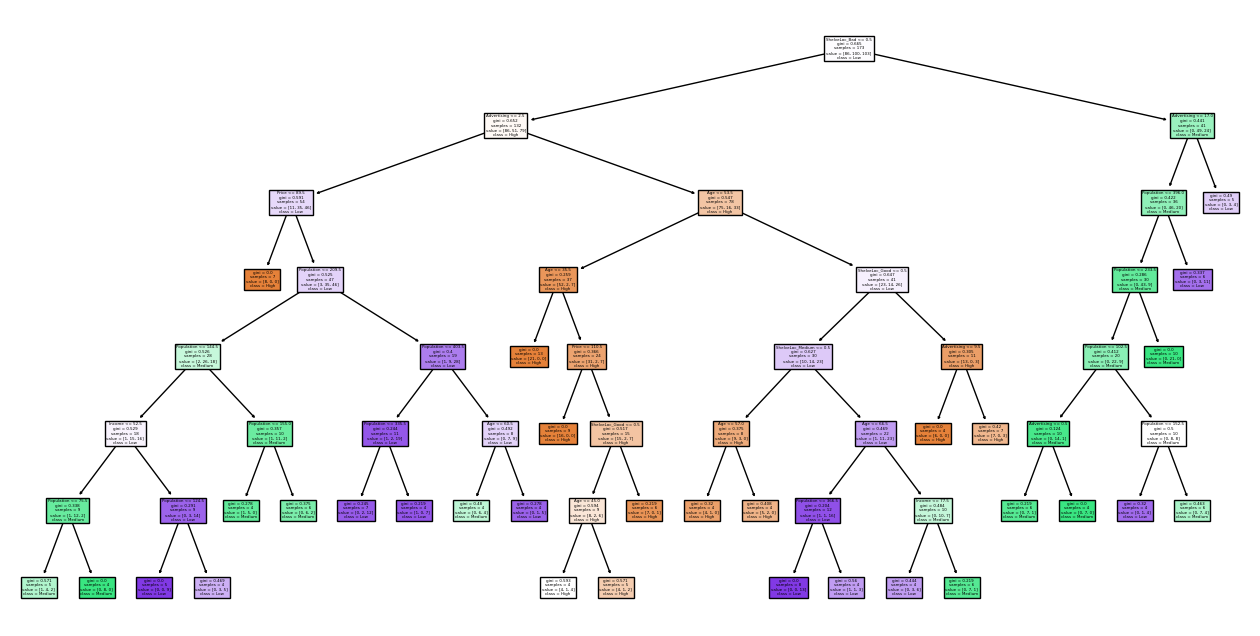

In [106]:
plt.figure(figsize=(16,8))
plot_tree(rf_best.estimators_[190], feature_names = model_data.columns,class_names=feat1.SalesCat.unique(),filled=True)
plt.show()

In [94]:
from pickle import dump

In [108]:
dump(rf_clf,open('feat_intell.pkl','wb'))